<a href="https://colab.research.google.com/github/nickinit/ml_study/blob/main/fuzzy-logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.	Лингвистические шкалы

In [8]:
# импорт библиотек

!pip install pyFTS
from pyFTS.partitioners.partitioner import Partitioner
from pyFTS.partitioners import Simple
from pyFTS.common import Membership

import numpy as np
import matplotlib.pyplot as plt

import os.path

     |████████████████████████████████| 175 kB 5.3 MB/s 


In [10]:
# импорт данных, если они есть. Иначе, задать свои
# данные должны храниться в файле fts_params.py
# x_qual - универсальное множество
# params - словарь, где k - название терма, v - его параметры [a0,a,a1]

if os.path.isfile('fts_params.py'):
    import fts_params
if not('x_qual' in locals()):
    x_qual = np.arange(0, 1000, 1)
if not('params' in locals()):
    params = {
      'Плохо': [0,0,150],
      'Ниже среднего': [0,250,360],
      'Средне': [230,360,450],
      'Выше среднего': [340,450,600],
      'Хорошо': [410,600,700],
      'Очень хорошо': [590,750,835],
      'Бесподобно': [760,1000,1000],
    } 


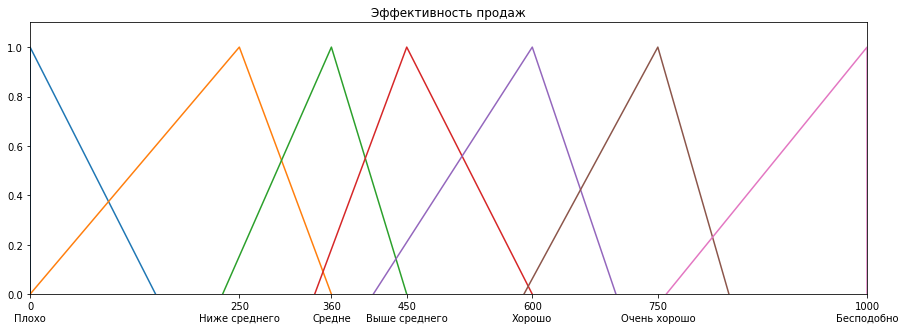

In [33]:
# Создание лингвистической шкалы (лингвистической переменной)
# путём добавления треугольных функций принадлежности к набору нечетких множеств

fs = Simple.SimplePartitioner()
fs.name = 'Эффективность продаж'

for k,v in params.items():
  fs.append(k, Membership.trimf, v)

#grid.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

# 2.	Нечеткие временные ряды и ряды нечетких тенденций. 

In [100]:
# импорт данных, если они есть. Иначе, задать свои
# данные должны храниться в файле fts_params.py
# x_qual - универсальное множество
# params - словарь, где k - название терма, v - его параметры [a0,a,a1]

# сенерировать время за период (по дням), если нет даты
import pandas as pd
from datetime import datetime
import numpy as np


if os.path.isfile('fts_params.py'):
    import fts_params

if not('x_qual' in locals()):
    x_qual = np.arange(0, 1000, 1)

if not('data_2_fts' in locals()):
    if not('params_2' in locals()):
        params_2 = {
          'fts_start': '2022-01-01', # дата начала для ВР
          'fts_end': '2022-03-01',  # дата конца
          'freq': 'D', # частота значений (D - день)
        } 

        date_rng = pd.date_range(start=params_2['fts_start'],
                         end=params_2['fts_end'], 
                         freq=params_2['freq'])

        # заполнить временной ряд случайными значениями 
        # на множестве возможных значений x_qual

        df = pd.DataFrame(date_rng, columns=['date'])
        df['sales'] = np.random.randint(x_qual[0], x_qual[-1],size=(len(date_rng)))

# если данные определены, то подгрузить         
else:
  df = pd.DataFrame( data_2_fts )

df

,date,sales
0,2022-01-01,189
1,2022-01-02,613
2,2022-01-03,168
3,2022-01-04,31
4,2022-01-05,230
5,2022-01-06,294
6,2022-01-07,430
7,2022-01-08,570
8,2022-01-09,221
9,2022-01-10,122


In [101]:
# Логистическая переменная из п.1
print(fs)

Эффективность продаж:
Плохо: trimf([0, 0, 150])
Ниже среднего: trimf([0, 250, 360])
Средне: trimf([230, 360, 450])
Выше среднего: trimf([340, 450, 600])
Хорошо: trimf([410, 600, 700])
Очень хорошо: trimf([590, 750, 835])
Бесподобно: trimf([760, 1000, 1000])



In [102]:
# определение функции принадлежности 
# оставляем только максимальную

memberships = []
for i in range(len(df['sales'])):
  memberships.append(max([m.membership(df['sales'][i]) for m in fs]))
  
df = pd.concat([df, pd.DataFrame({'memberships':memberships})], axis=1)
df

,date,sales,memberships
0,2022-01-01,189,0.756000
1,2022-01-02,613,0.870000
2,2022-01-03,168,0.672000
3,2022-01-04,31,0.793333
4,2022-01-05,230,0.920000
5,2022-01-06,294,0.600000
6,2022-01-07,430,0.818182
7,2022-01-08,570,0.842105
8,2022-01-09,221,0.884000
9,2022-01-10,122,0.488000


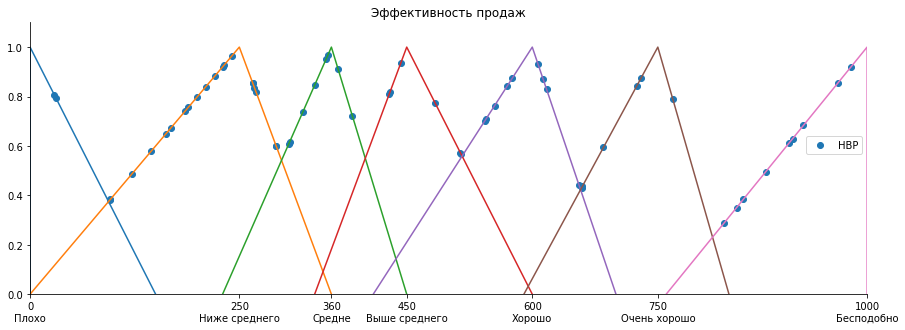

In [103]:
# Отображение нечеткого временного ряда на лингвистической переменной

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(df['sales'], df['memberships'], label='НВР')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Эффективность продаж', size=24, weight='bold')
ax.legend(bbox_to_anchor=(1, 0.6))

fs.plot(ax)
plt.show()

In [104]:
# формирование тенденций

# фазификация
fuzzyfied = fs.fuzzyfy(df['sales'].tolist(), method='maximum', mode='sets')

# получение отношений
from pyFTS.common import FLR
patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

# генерация правил
from pyFTS.models import chen
data = df['sales'].tolist()
model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)
print(model)

Conventional FTS:
Плохо -> Выше среднего,Ниже среднего
Хорошо -> Выше среднего,Ниже среднего,Средне,Хорошо
Ниже среднего -> Бесподобно,Выше среднего,Ниже среднего,Очень хорошо,Плохо,Средне,Хорошо
Очень хорошо -> Бесподобно,Ниже среднего,Средне,Хорошо
Бесподобно -> Бесподобно,Ниже среднего,Средне,Хорошо
Средне -> Бесподобно,Ниже среднего,Очень хорошо,Средне
Выше среднего -> Бесподобно,Выше среднего,Очень хорошо,Хорошо



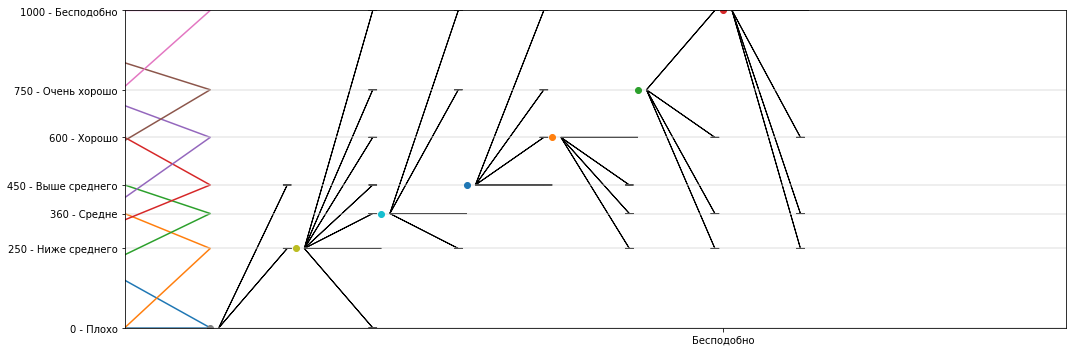

In [105]:
# отображение на графики нечетких тенденций и нечетких меток
from pyFTS.common import Util

Util.plot_rules(model, size=[15,5] , rules_by_axis=10)

# 3.	Кластеризация и лингвистические шкалы. 

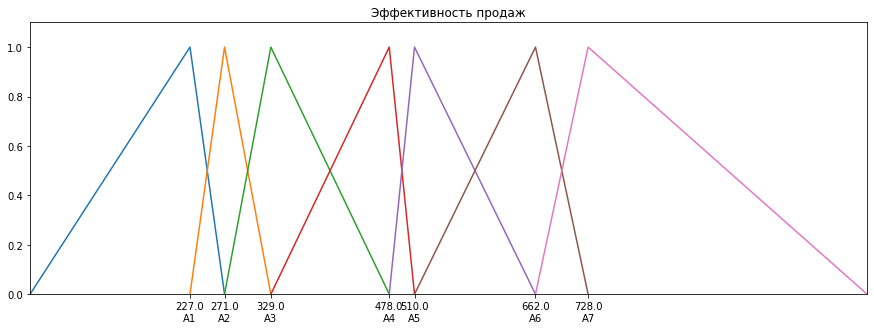

In [155]:
# проверяет были ли входные параметры

from pyFTS.partitioners import FCM as pUtil
from pyFTS.common import Membership as mf

npart = 7
n_clusters = 2

if 'data_3_pred' in locals():
  data = data_3_pred
if 'npart_3' in locals():
  npart = npart_3
if 'n_clusters_3' in locals():
  n_clusters = n_clusters_3

names = []
fcm = FCM.FCMPartitioner(data=data, npart=npart)
fcm.n_clusters = n_clusters

if 'custom_names_3' in locals():
  c = 0
  for i in fcm:
    if c < len(custom_names_3):
      i.name = custom_names_3[c]
      c += 1 
    else: break
    
fcm.name = 'Эффективность продаж'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
fcm.plot(ax)



# 4.	Прогнозирование значения временного ряда с помощью нейронной сети. 

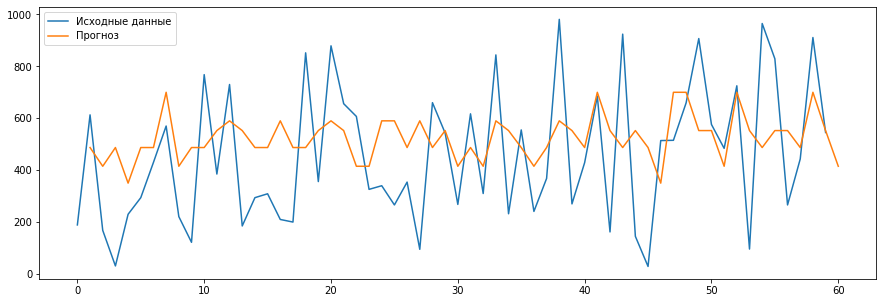

In [161]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = model.predict(data)
forecasts.insert(0,None)

orig, = plt.plot(data, label="Исходные данные")
pred, = plt.plot(forecasts, label="Прогноз")

plt.legend(handles=[orig, pred])

# 5.	Прогнозирование значения временного ряда с помощью моди- фицированного метода Сонга

In [ ]:
from pyFTS.models import song
model = song.ConventionalFTS(partitioner=fs)
model.fit(data)

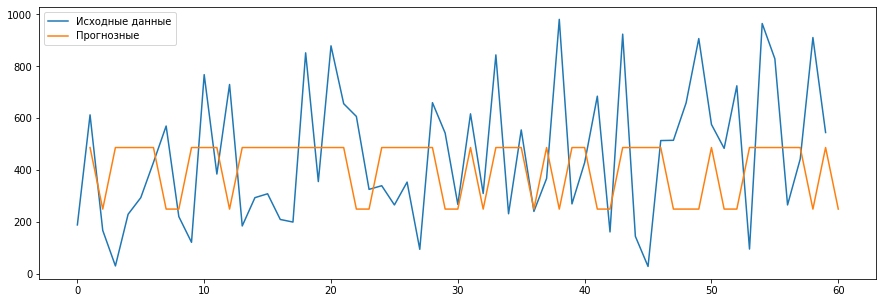

In [168]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = model.predict(data)
forecasts.insert(0,None)

orig, = plt.plot(data, label="Исходные данные")
pred, = plt.plot(forecasts, label="Прогнозные")

plt.legend(handles=[orig, pred])

# 6. F-преобразование

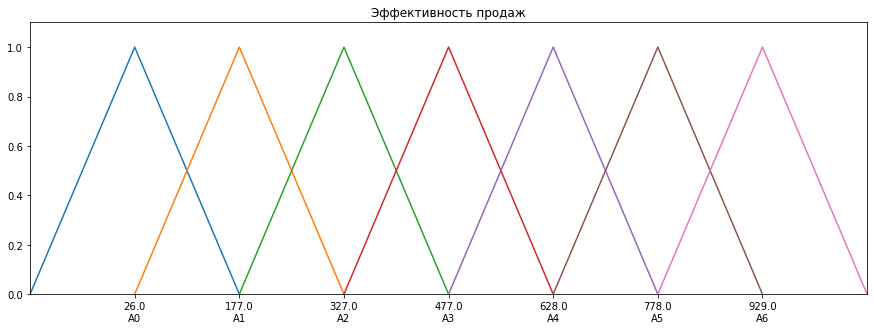

In [173]:
from pyFTS.partitioners import Grid
nof = Grid.GridPartitioner(data=data, npart=7)
nof.name = 'Эффективность продаж'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
nof.plot(ax)

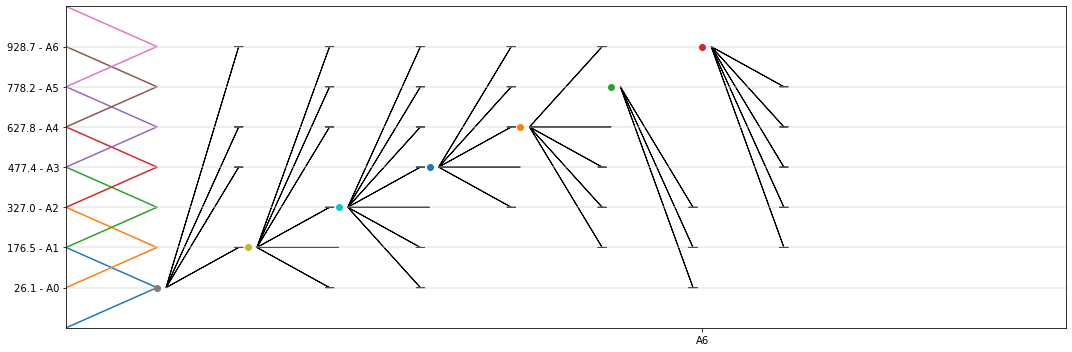

In [175]:
model = chen.ConventionalFTS(partitioner=nof)
model.fit(data)

Util.plot_rules(model, size=[15,5] , rules_by_axis=10)